In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
from glob import glob
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

2024-05-09 20:32:01.759094: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 20:32:01.765058: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 20:32:01.814137: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 20:32:03.059221: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf

In [4]:
pip install matplotlib
pip install scikit-learn
pip install Pillow
pip install pandas
pip install tqdm
pip install opencv-python
pip install --upgrade tensorflow pillow
!pip install Pillow
!pip install kaggle
!pip install opencv-python
!pip install tqdm
!pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c state-farm-distracted-driver-detection

mkdir: cannot create directory ‘/home/exouser/.kaggle’: File exists


100%|██████████████████████████████████████▉| 3.99G/4.00G [00:24<00:00, 189MB/s]
100%|███████████████████████████████████████| 4.00G/4.00G [00:24<00:00, 174MB/s]


In [3]:
import pandas as pd
df = pd.read_csv('Downloads/state-farm-distracted-driver-detection/driver_imgs_list.csv')
df.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [4]:
import splitfolders
data_dir = 'Downloads/state-farm-distracted-driver-detection/imgs/train'
splitfolders.ratio(data_dir, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 22424 files [00:05, 4335.49 files/s]


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size and image size for the data generator
batch_size = 32
img_height = 224
img_width = 224

# Create an instance of the ImageDataGenerator class with no augmentation
datagen_train = ImageDataGenerator(rescale=1./255)

# Create a separate instance of the ImageDataGenerator class for the validation data
datagen_val = ImageDataGenerator(rescale=1./255)

# Create separate generators for the training and validation sets
train_generator = datagen_train.flow_from_directory(
    'output/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen_val.flow_from_directory(
    'output/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',

)

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [6]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version is the same as TensorFlow version.")

TensorFlow version: 2.16.1
Keras version is the same as TensorFlow version.


In [7]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

image_count = 1
BASE_URL = 'Downloads/state-farm-distracted-driver-detection/imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)

In [50]:
model4 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [51]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,990,026 (38.11 MB)

 Trainable params: 9,990,026 (38.11 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history4 = model4.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = 32,
    epochs=10
)

Epoch 1/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 958s 2s/step - accuracy: 0.5050 - loss: 1.3532 - val_accuracy: 0.9735 - val_loss: 0.1011
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - accuracy: 0.9823 - loss: 0.0652 - val_accuracy: 0.9846 - val_loss: 0.0511
Epoch 3/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - accuracy: 0.9915 - loss: 0.0317 - val_accuracy: 0.9871 - val_loss: 0.0433
Epoch 4/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9882 - val_loss: 0.0496
Epoch 5/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.9930 - loss: 0.0240 - val_accuracy: 0.9846 - val_loss: 0.0667
Epoch 6/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 956s 2s/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9878 - val_loss: 0.0404
Epoch 7/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 954s 2s/step - accuracy: 0.9950 - loss: 0.0161 - val_accuracy: 0.9880 - val_loss: 0.0514
Epoch 8/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 952s 2s/step - accuracy: 0.9965 - loss: 0.0180 - val_accu

In [53]:
model4.save('model1with1M.h5')

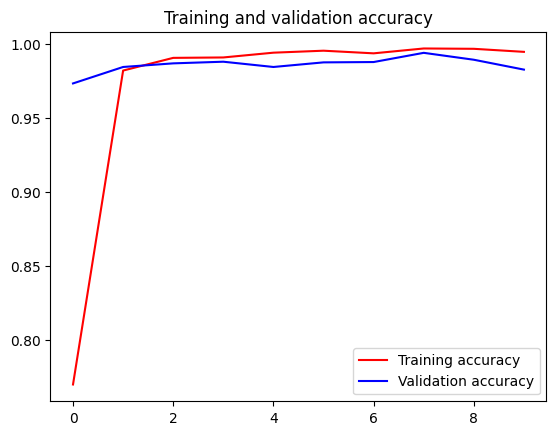

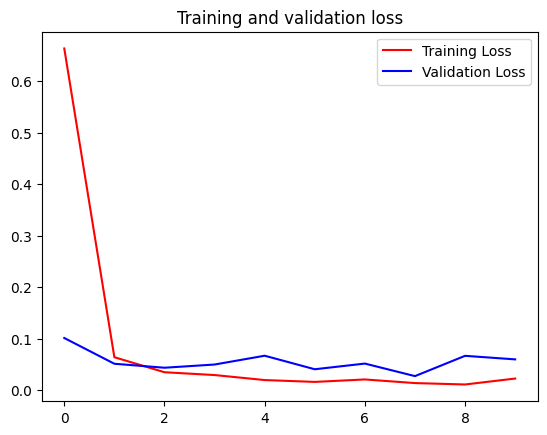

In [54]:
import matplotlib.pyplot as plt

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:

model5 = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),  # Dropout layer after the first dense layer
    
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),  # Another dropout layer after the second dense layer
    
    layers.Dense(10, activation='softmax'),
])

/home/exouser/.conda/envs/a4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from tensorflow.keras import models, layers, optimizers
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)

model5.compile(optimizer=sgd_optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,993,866 (38.12 MB)

 Trainable params: 9,991,946 (38.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [20]:
history5 = model5.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = 32,
    epochs=5
)

Epoch 1/5


/home/exouser/.conda/envs/a4/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 2888s 5s/step - accuracy: 0.4866 - loss: 1.5354 - val_accuracy: 0.9539 - val_loss: 0.1866
Epoch 2/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2917s 5s/step - accuracy: 0.9235 - loss: 0.2644 - val_accuracy: 0.9793 - val_loss: 0.0708
Epoch 3/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2882s 5s/step - accuracy: 0.9553 - loss: 0.1487 - val_accuracy: 0.9911 - val_loss: 0.0281
Epoch 4/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2719s 5s/step - accuracy: 0.9731 - loss: 0.0929 - val_accuracy: 0.9918 - val_loss: 0.0234
Epoch 5/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2491s 4s/step - accuracy: 0.9831 - loss: 0.0589 - val_accuracy: 0.9931 - val_loss: 0.0221


In [ ]:
import matplotlib.pyplot as plt

acc2 = history5.history['accuracy']
val_acc2 = history5.history['val_accuracy']
loss2 = history5.history['loss']
val_loss2 = history5.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'r', label='Training accuracy')
plt.plot(epochs2, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'r', label='Training Loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()